## Scikit-Learn workflow
1. Get data ready
2. Pick a model (suited to problem)
3. Fit the model to the data and make a prediction
 - estimating parameters (learning patterns)
 - make prediction using estimated parameters (using patterns)
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

-- machine writes the function [model writes the function] -- 
 * e.g. algorithm
 * we pass inputs and outputs, model "fits" the function

<img src="../images/sklearn-workflow-title.png"/>

## 0. An end-to-end scikit-learn workflow

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 1. Get the data ready

df_heart = pd.read_csv('/Users/jschmidt345/udemy/zero-to-mastery-ml/data/heart-disease.csv')
df_heart.shape

(303, 14)

In [3]:
# create x (feature vars, independent vars -> form is matrix)
X = df_heart.drop('target', axis=1)

# created y (labels, output, dummy var in this case)
y = df_heart['target']

In [ ]:
# 2. Choose the right model and 
### classification model -> supervised learning
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Keep default hyperparams
clf.get_params()

In [ ]:
# 3. fit the model to the [training] data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.2)


In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_preds = clf.predict(X_test)

In [ ]:
# 4. evaluate the model on training data, testing data
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
accuracy_score(y_test, y_preds)

In [ ]:
# 5. improve model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100: .2f}%')
    
    
    
    
    
    

In [ ]:
#6. save model and load it
import pickle

pickle.dump(clf, open("random_forest_model.pk1", "wb"))

In [ ]:
loaded_model = pickle.load(open('random_forest_model.pk1', 'rb'))
loaded_model.score(X_test, y_test)

## 1. Getting our data ready

Three main things we have to do: 
    1. Split the data into features and labels
    2. Filling (also called imputing) or disregarding missing vals
    3. Converting non-numeric values to numeric (called feature encoding)
    

In [ ]:
df_heart.head()

In [ ]:
X = df_heart.drop('target', axis=1)
y = df_heart['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

### 1.1 Make sure data is numeric

In [145]:
df2 = pd.read_csv('/Users/jschmidt345/udemy/zero-to-mastery-ml/data/car-sales-extended.csv')

In [ ]:
X = df2.drop('Price', axis=1)
y = df2['Price']

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [ ]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [ ]:
# Turn categorical data into numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_x = transformer.fit_transform(X)

In [ ]:
dummies = pd.get_dummies(df2[['Make', 'Colour', 'Doors']])

In [ ]:
# refit model
X_train, X_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)

In [ ]:
X.head()

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

## 1.2 What if there were missing value

1. Fill them with some value (imputation)
2. Remove the samples with missing data

In [148]:
df2_na = pd.read_csv('/Users/jschmidt345/udemy/zero-to-mastery-ml/data/car-sales-extended-missing-data.csv')

#### Option 1: fill missing data with pandas

In [ ]:
# fill the make column
df2_na['Make'].fillna('missing', inplace=True)

# fill the colour column
df2_na['Colour'].fillna('missing', inplace=True)

#fill the odom
df2_na['Odometer (KM)'].fillna(df2_na['Odometer (KM)'].mean(), inplace=True)

# fill the doors
df2_na['Doors'].fillna(4, inplace=True)


In [ ]:
# remove rows with na price values
df2_na.dropna(inplace=True)
df2.isna().sum()
len(df2_na)

In [ ]:
X, y = df2_na.drop('Price', axis=1), df2_na['Price']

In [ ]:
# lets try and convert data to numbers
# Turn categorical data into numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_x = transformer.fit_transform(df2_na)
transformed_x

### Option 2: Fill missing values with sci-kit learn


#### ***best to fill and transform training and test sets separately***

In [ ]:
df2_na.isna().sum()

In [ ]:
# drop rows with no labels
df2_na.dropna(subset=['Price'], inplace=True)
df2_na.isna().sum()

In [ ]:
# split x and y
X, y = df2_na.drop('Price', axis=1), df2_na['Price']

In [ ]:
# fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical vals with missing, numerical with mean
cat_imputer = SimpleImputer(strategy='constant', 
                            fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', 
                             fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# define cols
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
df2_filled = pd.DataFrame(filled_X, 
                          columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_x = transformer.fit_transform(df2_filled)
transformed_x

In [ ]:
# now we've got our data as numbers and no na's
# time to fit model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)
# y_pred = model.fit(X_test, y_test)

## 2. Choosing the right estimator/algo for our problem

Scikit-Learn uses estimator as another term for ml model

* Classification - predicting whether a sample is one thing or another 

* Regression - predicting a number

Step 1 - check ml map

### 2.1 Picking ML model for regression

In [3]:
# import housing df
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

In [ ]:
# using ridge reg based off of diagram 
from sklearn.linear_model import Ridge

# set seed
np.random.seed(42)

# create the data
X, y = boston_df.drop('target', axis=1), boston_df['target']

# split into train and test splits (assumption of no nan and categorical)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)
model = Ridge()
model.fit(X_train, y_train)
score_ridge = model.score(X_test, y_test)

How do we improve this score?

What if Ridge was not working?

Map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
# ensamble methods -> random forest

In [ ]:
# lets try random forest
from sklearn.ensemble import RandomForestRegressor

# set random seed 
np.random.seed(42)

# Create data
X, y = boston_df.drop('target', axis=1), boston_df['target']

# split into test - train
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)
# fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)
score_forest = model.score(X_test, y_test)

# model comparison -> same data due to seed
print(f'Score ridge : {score_ridge.round(2)}, Score forest : {score_forest.round(2)}')

## Decision tree notes
- create if else statement program by yourself (machine)
- based on data provided, construct decision tree based off of data

### 2.2 Choosing an estimator for a classification problem

In [ ]:
df_heart = pd.read_csv('/Users/jschmidt345/udemy/zero-to-mastery-ml/data/heart-disease.csv')
df_heart.head()

In [ ]:
# try LinearSVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# set up random seed
np.random.seed(42)

# structure data
X, y = df_heart.drop('target', axis=1), df_heart['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)
# structure model
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# score
clf.score(X_test, y_test)

# got super high score for some reason
# this is wrong

In [ ]:
# randomforest classifer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# set up random seed
np.random.seed(42)

# structure data
X, y = df_heart.drop('target', axis=1), df_heart['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)
# structure model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# score
clf.score(X_test, y_test)

# got super high score for some reason
# this is wrong

## Tidbit:
    1. if you have strucutred data, use ensemble methods
    2. if unstructured, use deep learning or transfer learning

## 3. Fit the model and make predictions

### 3.1 fitting the model to the data
- `X` = features, "regressors", independent vars
- `y` = labels, dependent vars, targets

In [ ]:
# randomforest classifer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# set up random seed
np.random.seed(42)

# structure data
X, y = df_heart.drop('target', axis=1), df_heart['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)
# structure model
clf = RandomForestClassifier()

# fit model to data
clf.fit(X_train, y_train)

# score makes predictions based using x_test, determine accuracy based on actual
clf.score(X_test, y_test)

In [ ]:
# fitting the model -> goes through the x's and tries to find pattern to y

### 3.2 make predictions using model

2 ways to make predictions:
   1. `predict()`
   2. `predict_proba()`

In [ ]:
clf.predict(X_test)

In [ ]:
# compare predictions to observed 
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

make predictions with `predict_proba()`

In [ ]:
# predict_proba() returns probabilities of a classificiation label
clf.predict_proba(X_test)

`predict()` can also be used for regression models

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create data
X, y = boston_df.drop('target', axis=1), boston_df['target']

# split data
X_test, X_train, y_test, y_train = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)

# construct model and fit
reg = RandomForestRegressor().fit(X_train, y_train)

# make predictions
y_preds = reg.predict(X_test)
(y_test - y_preds).plot(kind='hist')

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_preds)

## 4. Evaluating a ml model

Three ways to evaluate model
   1. Estimate `score` method
   2. The `scoring` parameter
   3. Problem-specific metric functions
   
### 4.1 Evaluating model with score method

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create data
X, y = df_heart.drop('target', 1), df_heart['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)
# fit model
clf = RandomForestClassifier().fit(X_train, y_train)

# score method
clf.score(X_test, y_test)
# predict 
# y_pred = clf.predict(X_test)
# accuracy_score(y_test, y_pred)

0.8524590163934426

Now for regression : 

In [4]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create data
X, y = boston_df.drop('target', axis=1), boston_df['target']

# split data
X_test, X_train, y_test, y_train = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)

# construct model and fit
reg = RandomForestRegressor().fit(X_train, y_train)

NameError: name 'boston_df' is not defined

In [5]:
reg.score(X_test, y_test)
# this returns the R^2. 

NameError: name 'reg' is not defined

### 4.2 Evaluating a model using the `scoring` parameter

In [6]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# create data
X, y = df_heart.drop('target', 1), df_heart['target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)
# fit model
clf = RandomForestClassifier().fit(X_train, y_train);

In [7]:
clf.score(X_test, y_test)

0.8524590163934426

- default = 5-fold
- model is trained on 5 different versions of training data, and evaluated on 5 different versions of the test data
<img src='Screen Shot 2020-05-19 at 4.50.08 PM.png'>

In [8]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# avg value of cros  s val scores
clf_avg_cross_val = np.mean(cross_val_score(clf, X, y))

print(f'single score : {clf_single_score}, avg score : {clf_avg_cross_val}')

single score : 0.8524590163934426, avg score : 0.8248087431693989


In [9]:
# scoring param set to none by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy 
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

##### Accuracy

In [4]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X, y = df_heart.drop('target', 1), df_heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)
clf = RandomForestClassifier().fit(X_train, y_train)

cross_val = cross_val_score(clf, X, y, scoring='accuracy')

In [5]:
mean_accuracy = np.mean(cross_val)

In [6]:
print(f'Heart Disease Classifier Accuracy: {mean_accuracy * 100:.2f}5')

Heart Disease Classifier Accuracy: 81.165


**Area under the reciever operating characteristic curve (AUC/ ROC)**
- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's true positive rate (tpr), versus a models false positive rate (fpr).



In [9]:
from sklearn.metrics import roc_curve

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs_pos = y_probs[:, 1]

In [10]:
# calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_pos)

# check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [11]:
# create function for plotting roc curves
def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    # plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',
            label='guessing')
    
    # customize plot
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Reciever Operating Characteristic (ROC) Curve')
    plt.legend()

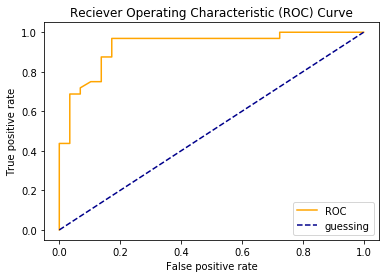

In [12]:
plot_roc_curve(fpr, tpr)

In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_pos)
# 93% are true positive 

0.9304956896551724

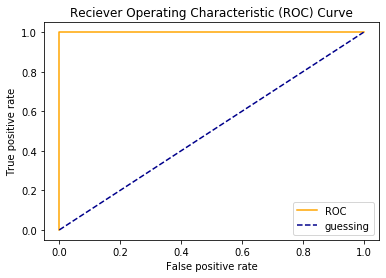

In [14]:
# plot perfect roc curve and auc score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

**Confusion Matrix**

A CM is a quick way to compare the labels a model predicts, and the actual labels it was supposed to predict

Gives you an idea of where the model is getting confused

In [15]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [16]:
# visualize confusin matrix with pd crosstab
pd.crosstab(y_test, y_preds, 
            rownames=['Actual Label'], 
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,4,28


In [17]:
# 5 false positives
# 4 false negatives
# use seaborns heatmap to visualize 

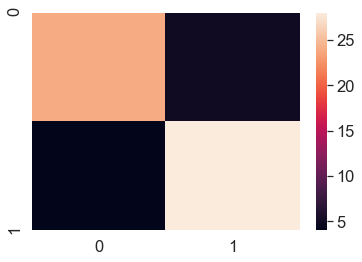

In [18]:
import seaborn as sns

# sent font scale
sns.set(font_scale=1.5)

# plot
sns.heatmap(confusion_matrix(y_test, y_preds));

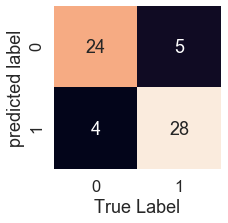

In [19]:
def plot_conf_mat(conf_mat):
    '''
    plot cm using seaborn heatmap
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat, 
                     annot=True, # annotate boxes with conf_mat info
                     cbar=False)
    bottom, top = ax.get_ylim()
    
    ax.set(xlabel='True Label',
           ylabel='predicted label', 
           ylim=(bottom + .5, top - .5))
   
    
    # fix the broken annotations
    
    
plot_conf_mat(confusion_matrix(y_test, y_preds))

**Classification report**

* precision : The proportion of positive identification which were actually correct. No false positives has a precision of 1.0
* Recall : The proportion of actual positives which were correctly classifed. No false negatives has a recall of 1.0 
* f1 score: a combination of precision and recall
* accuracy : the accuracy of the model is decimal form 
* Macro avg: the avg precision, recall and f1 score between the classes. Macro avg doesn't class imbalance into effort.
* Weighted avg: weighted avg precision, recall, and macro avg.
- weighted means each metric is calculated with respect to how many samples there are in each

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

NameError: name 'y_preds' is not defined

In [21]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds,
                                  output_dict=True))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [25]:
# when you have a large class imbalance, accuracy is not helpful

## 4.2.2 Regression Model evaluation metrics

1. R^2 
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [36]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X, y = boston_df.drop('target', axis=1), boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)
reg = RandomForestRegressor().fit(X_train, y_train)
print(f'R^2 : {reg.score(X_test, y_test)}')

NameError: name 'train_test_split' is not defined

In [38]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
r2_score(y_test, y_test_mean)

0.0

**mean absolute error**

MAE is the avg of the differences between predictions and actual values. it gives you an idea of how wrong your model's predictions are. 

In [43]:
# mean abs error
from sklearn.metrics import mean_absolute_error
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

2.136382352941176

In [44]:
df = pd.DataFrame(data={'Actual' : y_test,
                       'Pred' : y_pred})

**Mean Squared Error**
* mae^2

In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

9.867437068627442

### 4.23 Finally using the `scoring` parameter 

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X, y = df_heart.drop('target', axis=1), df_heart['target']
model = RandomForestClassifier()
#cv_acc = cross_val_score(model, X, y)

In [9]:
# cross-validated accuracy
print(f'the cross val acc is: {np.mean(cv_acc) * 100:.2f}%')

the cross val acc is: 82.48%


In [10]:
cv_acc = cross_val_score(model, X, y, scoring='accuracy')

In [11]:
cv_precision = cross_val_score(model, X, y, scoring='precision')

In [12]:
np.mean(cv_precision)

0.8209201193072161

In [13]:
cv_recall = cross_val_score(model, X, y, scoring='recall')

In [14]:
np.mean(cv_recall)

0.8484848484848484

In [15]:
cv_f1 = cross_val_score(model, X, y, scoring='f1')

In [16]:
np.mean(cv_f1)

0.8455032904593217

How about our regression model?

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
## do same thing with reg but use R^2, MAE, MSE

In [21]:
X, y = boston_df.drop('target', axis=1), boston_df['target']
regression = RandomForestRegressor()
reg_R2 = cross_val_score(regression, X, y)

In [26]:
reg_mae = cross_val_score(regression, X, y, scoring='neg_mean_absolute_error')

### 4.3 Using different evaluation metrics as Scikit-Learn functions

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

## no new info, just different ways to do it. 

## 5. Improving a model

- First predictions = baseline predictions
- Frist model = baseline model

From a data perspective:
* Could we collect more data
* Could we improve our data

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model? 


aside:
- simple model (linear SVC)
- complex model : SVC / Ensemble Classifiers
- "patterns" found in data = parameters, similar to b1 being a pattern or relationship (b1 is refered to as a parameter)
- Hyperparams = settings on a model you can adjust to improve model's ability to find patterns



In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [12]:
clf.get_params( )

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Three ways to adjust hyperparams:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 5.1 Tuning hyperparams by hand

Begin using a validation split for tuning

Going to try and adjust:

- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`

In [13]:
def evaluate_preds(y_true, y_preds, print_tf = False):
    '''
    Performs evaluation comparison on y_true vs. y_pred on
    classification model
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        'accuracy' : round(accuracy, 2),
        'precision' : round(precision, 2),
        'recall' : round(recall, 2),
        'f1' : round(f1, 2)
    }
    if print_tf:
        print(f'Acc: {accuracy * 100:.2f}%',
          f'Precision: {precision:.2f}',
          f'Recall : {recall:.2f}',
          f'f1: {f1:.2f}')
    
    return metric_dict

In [35]:
# need to manually split it if using validation set
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
df_heart_shuffled = df_heart.sample(frac=1)

# Split into X and y
X, y = df_heart_shuffled.drop('target', axis=1), df_heart_shuffled['target']

# split data into 3 sets
train_split = round(.7 * len(df_heart_shuffled)) # 70 % of dta
valid_split = round(train_split + .15 * (len(df_heart_shuffled)))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# make pred
y_preds = clf.predict(X_valid)

# Evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds, print_tf=True)

Acc: 82.22% Precision: 0.81 Recall : 0.88 f1: 0.85


In [31]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
np.random.seed(42)
# build second classifier with different hyperparams
clf_2 = RandomForestClassifier(n_estimators= 100)
clf_2.fit(X_train, y_train)
y_preds2 = clf_2.predict(X_valid)
baseline_metrics2 = evaluate_preds(y_valid, y_preds2, print_tf=True)

Acc: 82.22% Precision: 0.84 Recall : 0.84 f1: 0.84


### 5.2 Hyperparam tuning with RandomizedSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators' : [10, 100, 200, 500, 1000, 1200],
        'max_depth' : [None, 5, 10, 20, 30],
        'max_features' : ['auto', 'sqrt'],
        'min_samples_split' : [2, 4, 6],
        'min_samples_leaf' : [1, 2, 4]
       }
np.random.seed(42)
X, y = df_heart_shuffled.drop('target', axis=1), df_heart_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.2)
# instantiate randomforestclassisfer
clf = RandomForestClassifier(n_jobs=1)
# njobs is how much power you want to dedicate to the model
# -1 means all, by default n_jobs=None

# Setup Randomized search CV
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

rs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.9s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   39.7s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [55]:
# predict this way
rs_y_preds = rs_clf.predict(X_test)

# eval
evaluate_preds(y_test, rs_y_preds)

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [50]:

clf = RandomForestClassifier(n_estimators=200,
                             min_samples_split=6,
                             min_samples_leaf=2,
                             max_features='sqrt',
                             max_depth=None).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [68]:
rs_metrics = evaluate_preds(y_test, y_pred, print_tf=True)

Acc: 83.61% Precision: 0.78 Recall : 0.89 f1: 0.83


In [57]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

### 5.3 tuning with gridsearchCV

In [56]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [59]:
# reduced search space of hyperparams by using clf.best_param_
grid_2 = {
 'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]
}


In [61]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
X, y = df_heart_shuffled.drop('target', axis=1), df_heart_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.2)
# instantiate randomforestclassisfer
clf = RandomForestClassifier(n_jobs=1)
# njobs is how much power you want to dedicate to the model
# -1 means all, by default n_jobs=None

# Setup grid search CV
gs_clf = GridSearchCV(estimator=clf, 
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.8s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   43.2s finished


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [62]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [65]:
gs_y_preds = gs_clf.predict(X_test)

# eval 
gs_metrics = evaluate_preds(y_test, gs_y_preds, print_tf=True)

Acc: 78.69% Precision: 0.74 Recall : 0.82 f1: 0.78


In [67]:
'''
param workflow:
1. by hand
2. randomized search CV
3. grid search CV
 - instead of using initial grid, use randomized results to narrow search
'''


'\nparam workflow:\n >>> 1. by hand\n2. randomized search CV\n3. grid search CV\n - instead of using initial grid, use randomized results to narrow search\n'

Let's compare our models metrics

In [78]:
compare_metrics = pd.DataFrame({'baseline' : baseline_metrics,
                                'clf_2' : baseline_metrics2,
                                'random_cv' : rs_metrics,
                                'g_search_cv' : gs_metrics})

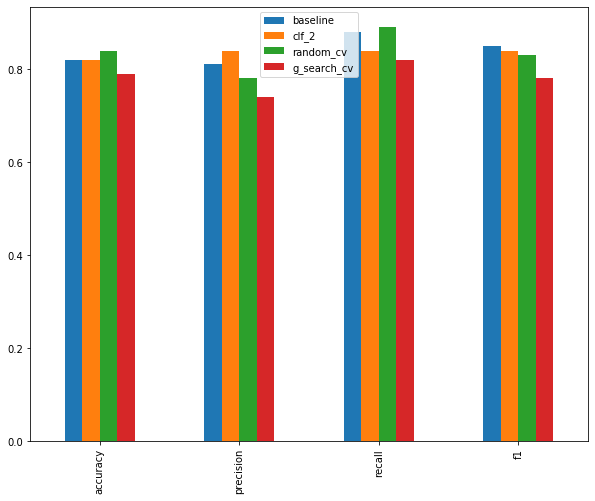

In [84]:
compare_metrics.plot(kind='bar', figsize=(10, 8));
#### careful : baseline model was trained on differently split data

## 6. Saving and loading trained ML models

Two ways: 
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [85]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open('gs_random_forest_model1.pkl', 'wb'))

In [86]:
# load a saved model
loaded_pickle_model = pickle.load(open('gs_random_forest_model1.pkl', 'rb'))

In [88]:
predz = loaded_pickle_model.predict(X_test)
eval_pickle_model = evaluate_preds(y_test, predz) 

**Joblib**

In [92]:
from joblib import dump, load

# save model 
dump(gs_clf, filename='gs_random2.joblib')

['gs_random2.joblib']

In [93]:
# load in
loaded_joblib = load(filename='gs_random2.joblib')

In [95]:
preds_job = loaded_joblib.predict(X_test)
evaluate_job_model = evaluate_preds(y_test, preds_job, print_tf=True)

Acc: 78.69% Precision: 0.74 Recall : 0.82 f1: 0.78


## 7. Putting it all together 

In [107]:
df = df2_na

In [108]:
df.dtypes
# not all data is numeric, must fix

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [109]:
df.isna().sum()
# some na values present, must fix

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (in one cell):
1. Fill Na's
2. Convert to numeric
3. Build model on data

In [153]:
df2_na

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [160]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# set seed
np.random.seed(42)

# import data and drop rows
df = df2_na
df.dropna(subset=['Price'], inplace=True)

# What transformations do we need to make
# define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformers = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# setup preprocessing steps (fill na, convert to number)
preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', categorical_transformer, categorical_features),
                        ('door', door_transformer, door_feature),
                        ('num', numeric_transformers, numeric_features)
                    ])

# create a preproccessing and modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split data 
X, y = df.drop('Price', axis=1), df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

# fit and score
# model.fit(X_train, y_train)
# model.score(X_test, y_test)


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [151]:
# use pipeline with grid search 
pipe_grid = {
    'preprocessor__num__imputer__strategy' : ['mean', 'median'],
    'model__n_estimators' : [100, 1000],
    'model__max_depth' : [None, 5],
    'model__max_features' : ['auto'],
    'model__min_samples_split' : [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.8min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [152]:
gs_model.score(X_test, y_test)

0.3339554263158365

In [164]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
cat_features = ['Make', 'Colour']
imp = ColumnTransformer([
    ('cat', cat_imputer, cat_features)
])
xx = imp.fit_transform(X)
for i in xx:
    print(i)

['Honda' 'White']
['BMW' 'Blue']
['Honda' 'White']
['Toyota' 'White']
['Nissan' 'Blue']
['Honda' 'Red']
['Toyota' 'Blue']
['Honda' 'White']
['missing' 'White']
['Honda' 'Blue']
['Nissan' 'White']
['Nissan' 'Green']
['Nissan' 'White']
['missing' 'White']
['Honda' 'Blue']
['Toyota' 'Blue']
['Toyota' 'Red']
['BMW' 'White']
['Nissan' 'White']
['Nissan' 'Blue']
['Toyota' 'missing']
['Honda' 'missing']
['Toyota' 'White']
['Honda' 'Green']
['Honda' 'Blue']
['Honda' 'Blue']
['Honda' 'White']
['Honda' 'Green']
['Honda' 'White']
['Toyota' 'White']
['Nissan' 'Blue']
['Toyota' 'White']
['Nissan' 'White']
['Nissan' 'Green']
['Honda' 'Blue']
['Honda' 'Blue']
['Nissan' 'Blue']
['Nissan' 'White']
['Nissan' 'Blue']
['Toyota' 'Green']
['missing' 'White']
['Toyota' 'Blue']
['Honda' 'Black']
['Toyota' 'Blue']
['Toyota' 'Blue']
['Nissan' 'Blue']
['Toyota' 'White']
['Toyota' 'Blue']
['Nissan' 'White']
['Toyota' 'Black']
['Toyota' 'Red']
['Honda' 'White']
['Toyota' 'Blue']
['Toyota' 'Blue']
['missing' 'White